# Polynomial interpolation using Vandermonde matrices (and its comparison with other methods)

## 1. The interpolation problem

Given $n+1$ distinct data points $(x_0, y_0), (x_1, y_1), \dots, (x_n, y_n)$, we want to find a <ins>unique</ins> polynomial $P_n(x)$ of degree at most $n$ such that $P_n(x_i) = y_i$ for all $i = 0, 1, \dots, n$:
$$
P_n(x) = a_0 + a_1x + a_2x^2 + \dots + a_nx^n
$$

For each data point $(x_i, y_i)$, we have the condition $P_n(x_i) = y_i$. Substituting this into the polynomial expression, we get a system of linear equations:
\begin{align*}
a_0 + a_1x_0 + a_2x_0^2 + \dots + a_nx_0^n &= y_0 \\
a_0 + a_1x_1 + a_2x_1^2 + \dots + a_nx_1^n &= y_1 \\
\vdots \\
a_0 + a_1x_n + a_2x_n^2 + \dots + a_nx_n^n &= y_n
\end{align*}

This system can be written in matrix form as $\boldsymbol{V}\boldsymbol{a} = \boldsymbol{y}$:

$$
\begin{pmatrix}
1 & x_0 & x_0^2 & \dots & x_0^n \\
1 & x_1 & x_1^2 & \dots & x_1^n \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & x_n^2 & \dots & x_n^n
\end{pmatrix}
\begin{pmatrix}
a_0 \\
a_1 \\
\vdots \\
a_n
\end{pmatrix}
=
\begin{pmatrix}
y_0 \\
y_1 \\
\vdots \\
y_n
\end{pmatrix}
$$

The matrix $\boldsymbol{V}$ is known as the **Vandermonde matrix**. If all $x_i$ are distinct, then the Vandermonde matrix is invertible, and a unique solution for the coefficients $\boldsymbol{a}$ exists: $\boldsymbol{a} = \boldsymbol{V}^{-1}\boldsymbol{y}$.

## 2. Constructing the Vandermonde matrix

In [1]:
import numpy as np
np.set_printoptions(linewidth=200)

def create_vandermonde_matrix(x_vec, increasing=False):
    """
    Creates a Vandermonde matrix for a given set of x-points.

    Args:
        x_vec (array-like): A 1D array or list of x-coordinates.
        increasing (bool):  If True, the powers of x are increasing [x^0, x^1, ..., x^n]
                            If False (default), the powers are decreasing [x^n, x^(n-1), ..., x^0]

    Returns:
        numpy.ndarray: The Vandermonde matrix.
    """
    x_vec = np.array(x_vec, dtype=float)
    n = len(x_vec) - 1
    if increasing:
        V = np.column_stack([x_vec**j for j in range(n+1)])
    else:
        # This is how np.vander creates it by default
        V = np.column_stack([x_vec**(n-j) for j in range(n+1)])
    return V

# Example usage:
x = np.array([1, 2, 3, 4])

my_V_decr = create_vandermonde_matrix(x)
print("My Vandermonde matrix (decreasing powers):")
print(my_V_decr)

my_V_incr = create_vandermonde_matrix(x, increasing=True)
print("\nMy Vandermonde matrix (increasing powers):")
print(my_V_incr)

My Vandermonde matrix (decreasing powers):
[[ 1.  1.  1.  1.]
 [ 8.  4.  2.  1.]
 [27.  9.  3.  1.]
 [64. 16.  4.  1.]]

My Vandermonde matrix (increasing powers):
[[ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  3.  9. 27.]
 [ 1.  4. 16. 64.]]


## 3. Comparison with `np.vander` and `numpy.polynomial.polynomial.polyvander`

### 3.1 Comparison with `np.vander`

NumPy has a built-in function `np.vander` that efficiently creates Vandermonde matrices. By default, `np.vander` creates the matrix with *decreasing* powers of $x$ (i.e., $x^n, x^{n-1}, \dots, x^0$). Let's compare our custom function with `np.vander`.

In [2]:
# Compare with np.vander
np_V_decr = np.vander(x)
print("\nNumPy's np.vander matrix (default - decreasing powers):")
print(np_V_decr)

np_V_incr = np.vander(x, increasing=True)
print("\nNumPy's np.vander matrix (increasing powers):")
print(np_V_incr)

# Check that the output of create_vandermonde_matrix() equals the one of np.vander()
print("\nIs my decreasing Vandermonde matrix equal to np.vander()'s default?",
      np.allclose(my_V_decr, np_V_decr))

print("Is my increasing Vandermonde matrix equal to np.vander()'s increasing option?",
      np.allclose(np_V_incr, np_V_incr))


NumPy's np.vander matrix (default - decreasing powers):
[[ 1  1  1  1]
 [ 8  4  2  1]
 [27  9  3  1]
 [64 16  4  1]]

NumPy's np.vander matrix (increasing powers):
[[ 1  1  1  1]
 [ 1  2  4  8]
 [ 1  3  9 27]
 [ 1  4 16 64]]

Is my decreasing Vandermonde matrix equal to np.vander()'s default? True
Is my increasing Vandermonde matrix equal to np.vander()'s increasing option? True


As you can see, our custom function correctly reproduces the Vandermonde matrix, both in increasing and decreasing power configurations, matching `np.vander`.

### 3.2. Comparison with `numpy.polynomial.polynomial.polyvander`

NumPy's `numpy.polynomial` module provides a more object-oriented approach to polynomials, and `numpy.polynomial.polynomial.polyvander` is its equivalent for generating Vandermonde matrices for the *standard polynomial basis* (i.e., monomials $1, x, x^2, \dots$). This function always generates the matrix with *increasing* powers.

In [3]:
from numpy.polynomial import polynomial as poly

# Using the same "x"-data from before
# polyvander expects the "x"-points and the degree (m-1 where m is number of data)
poly_V_incr = poly.polyvander(x, deg=len(x) - 1)
print("\nNumPy's poly.polyvander() matrix (always increasing powers):")
print(poly_V_incr)

# Check if our increasing Vandermonde matrix matches poly.polyvander()
print("\nIs my increasing Vandermonde matrix equal to poly.polyvander()'s matrix?",
      np.allclose(my_V_incr, poly_V_incr))


NumPy's poly.polyvander() matrix (always increasing powers):
[[ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  3.  9. 27.]
 [ 1.  4. 16. 64.]]

Is my increasing Vandermonde matrix equal to poly.polyvander()'s matrix? True


We can confirm that `numpy.polynomial.polynomial.polyvander` generates the Vandermonde matrix in the increasing power order, matching our custom implementation when `increasing=True`. This function is useful when working with the `numpy.polynomial` framework.

## 4. Solving for coefficients and interpolation

Now, let's use the Vandermonde matrix to find the polynomial coefficients and perform interpolation.

In [4]:
# We'll use the decreasing Vandermonde matrix for consistency with the typical polynomial representation
x = np.array([-3, -1, 0, 4, 8])
y = 3*x**2 - 5*x + 7

# Calculate the decreasing Vandermonde matrix
np_V_decr = np.vander(x)

# Solving the system np_V_decr * a = y
coeffs = np.linalg.solve(np_V_decr, y)
print("Polynomial coefficients [a_3, a_2, a_1, a_0]:")
print(coeffs)

# Trim the small coefficients: 
# The small non-zero values are due to floating-point precision.
# Let's clean them up for display.
coeffs = np.round(coeffs, decimals=10)
print("\nTrimmed polynomial coefficients [a_3, a_2, a_1, a_0]:")
print(coeffs)

# Now, let's interpolate a new point
pol = np.poly1d(coeffs)

xx = 2.5
y_vander = pol(xx)
print(f"\nInterpolated y-value at x = {xx} for y = 3*x^2 - 5*x + 7 = {y_vander}")
print(f"Actual value for y = 3*x^2 - 5*x + 7 at x = {xx} = {3*xx**2 - 5*xx + 7}")

Polynomial coefficients [a_3, a_2, a_1, a_0]:
[-2.39239978e-17  1.91391983e-16  3.00000000e+00 -5.00000000e+00  7.00000000e+00]

Trimmed polynomial coefficients [a_3, a_2, a_1, a_0]:
[-0.  0.  3. -5.  7.]

Interpolated y-value at x = 2.5 for y = 3*x^2 - 5*x + 7 = 13.25
Actual value for y = 3*x^2 - 5*x + 7 at x = 2.5 = 13.25


## 4. Solving for coefficients and interpolation

Now, let's use the Vandermonde matrix to find the polynomial coefficients and perform interpolation. We'll also compare our results with `np.polyfit` and `scipy.interpolate.lagrange`.

In [5]:
# 4.1. Comparison with np.polyfit
# np.polyfit() returns coefficients in decreasing order of powers (x^n, x^(n-1), ..., x^0)
polyfit_coeffs = np.polyfit(x, y, len(x) - 1)
print("\nPolynomial coefficients from np.polyfit (decreasing powers):")
print(f"[a_3, a_2, a_1, a_0] (for P(x) = a_3*x^3 + a_2*x^2 + a_1*x + a_0):")
print(polyfit_coeffs)

# Trim the small coefficients: 
polyfit_coeffs = np.round(polyfit_coeffs, decimals=10)
print("\nTrimmed np.polyfit() coefficients:", polyfit_coeffs)

# Evaluate using np.polyval (which expects decreasing powers)
y_polyfit = np.polyval(polyfit_coeffs, xx)
print(f"\nInterpolated y-value at x = {xx} (np.polyfit): {y_polyfit}")


Polynomial coefficients from np.polyfit (decreasing powers):
[a_3, a_2, a_1, a_0] (for P(x) = a_3*x^3 + a_2*x^2 + a_1*x + a_0):
[ 0.00000000e+00  1.82094443e-16  3.00000000e+00 -5.00000000e+00  7.00000000e+00]

Trimmed np.polyfit() coefficients: [ 0.  0.  3. -5.  7.]

Interpolated y-value at x = 2.5 (np.polyfit): 13.25


In [6]:
# 4.2. Comparison with scipy.interpolate.lagrange()
from scipy.interpolate import lagrange

# lagrange returns a polynomial object where .coefficients gives coefficients
# in decreasing order of powers.
lagrange_poly = lagrange(x, y)
lagrange_coeffs = lagrange_poly.coefficients
print("\nPolynomial coefficients from scipy.interpolate.lagrange (decreasing powers):")
print(f"[a_3, a_2, a_1, a_0] (for P(x) = a_3*x^3 + a_2*x^2 + a_1*x + a_0):")
print(lagrange_coeffs)

# Trim the small coefficients: 
lagrange_coeffs = np.round(lagrange_coeffs, decimals=10)
print("\nTrimmed scipy.interpolate.lagrange() coefficients:", lagrange_coeffs)

# Evaluate using lagrange_poly (this uses the untrimmed coefficients)
y_lagrange = lagrange_poly(xx)
print(f"\nInterpolated y-value at x = {xx} (scipy.interpolate.lagrange): {y_lagrange}")


Polynomial coefficients from scipy.interpolate.lagrange (decreasing powers):
[a_3, a_2, a_1, a_0] (for P(x) = a_3*x^3 + a_2*x^2 + a_1*x + a_0):
[-1.38777878e-17  2.22044605e-16  3.00000000e+00 -5.00000000e+00  7.00000000e+00]

Trimmed scipy.interpolate.lagrange() coefficients: [-0.  0.  3. -5.  7.]

Interpolated y-value at x = 2.5 (scipy.interpolate.lagrange): 13.250000000000002


In [7]:
print("\n--- Summary of interpolated values at x = 2.5 ---")
print(f"Vandermonde: {y_vander}")
print(f"np.polyfit(): {y_polyfit}")
print(f"scipy.interpolate.lagrange(): {y_lagrange}")
print(f"Actual value for y = 3*x^2 - 5*x + 7 at x = {xx} = {3*xx**2 - 5*xx + 7}")


--- Summary of interpolated values at x = 2.5 ---
Vandermonde: 13.25
np.polyfit(): 13.25
scipy.interpolate.lagrange(): 13.250000000000002
Actual value for y = 3*x^2 - 5*x + 7 at x = 2.5 = 13.25


As you can see, all three methods (`Vandermonde`, `np.polyfit`, and `scipy.interpolate.lagrange`) produce essentially the same polynomial for this well-behaved set of data points, yielding very similar interpolated values. The slight differences in coefficients are due to numerical precision and how each method handles the underlying calculations. `np.polyfit` and `scipy.interpolate.lagrange` are generally more robust and numerically stable for interpolation than directly inverting a Vandermonde matrix, especially for higher degrees.

## 5. Plot the interpolating polynomial

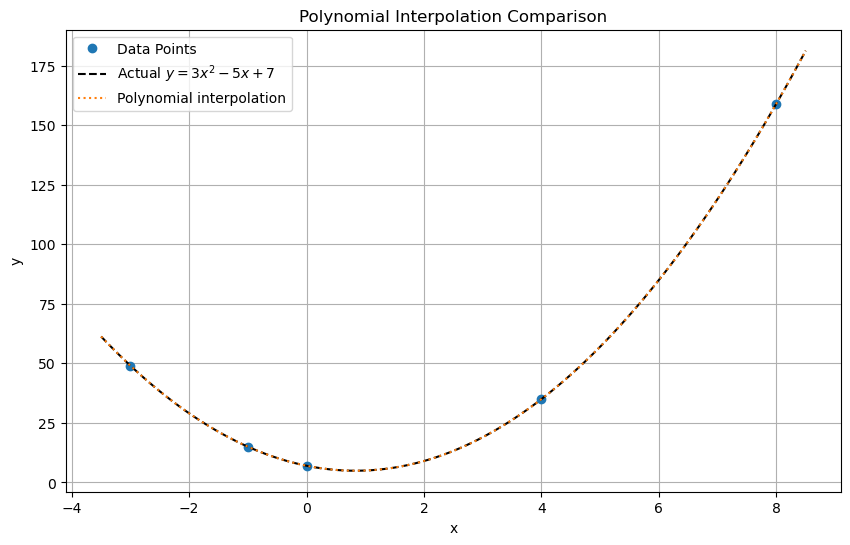

In [8]:
# Let's plot the interpolated polynomials
import matplotlib.pyplot as plt

x = np.array([-3, -1, 0, 4, 8])
y = 3*x**2 - 5*x + 7

xx = np.linspace(min(x) - 0.5, max(x) + 0.5, 100)
yy = 3*xx**2 - 5*xx + 7

# Calculate the interpolating polynomial
lagrange_poly = lagrange(x, y)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data Points')
plt.plot(xx, yy, 'k--', label='Actual $y=3x^2 - 5x + 7$')
plt.plot(xx, lagrange_poly(xx), ':', label='Polynomial interpolation')

plt.title('Polynomial Interpolation Comparison')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## 5. Condition number and numerical stability

The condition number of a matrix is a measure of how sensitive the solution of a linear system $\boldsymbol{A}\boldsymbol{x} = \boldsymbol{b}$ is to changes in $\boldsymbol{b}$. A large condition number indicates that small errors in the input data (or round-off errors during computation) can lead to large errors in the solution.

For Vandermonde matrices, the condition number tends to grow very rapidly as the number of data points ($n$) increases, especially when the $x_i$ values are close together or span a large range. This makes solving linear systems involving Vandermonde matrices numerically unstable for higher degrees.

Let's observe this phenomenon.

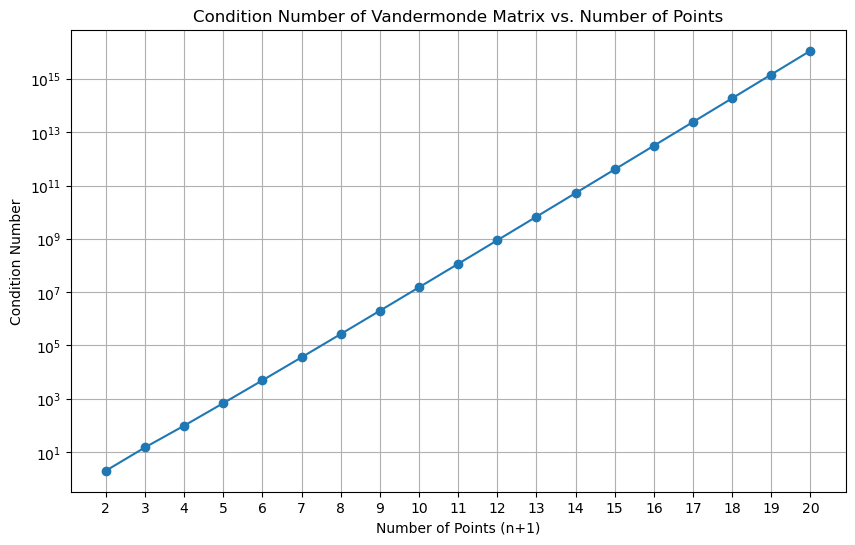


Condition numbers for different number of points:
n =  2: Condition Number = 2.00e+00
n =  3: Condition Number = 1.50e+01
n =  4: Condition Number = 9.80e+01
n =  5: Condition Number = 6.86e+02
n =  6: Condition Number = 4.92e+03
n =  7: Condition Number = 3.61e+04
n =  8: Condition Number = 2.68e+05
n =  9: Condition Number = 2.01e+06
n = 10: Condition Number = 1.52e+07
n = 11: Condition Number = 1.16e+08
n = 12: Condition Number = 8.83e+08
n = 13: Condition Number = 6.78e+09
n = 14: Condition Number = 5.22e+10
n = 15: Condition Number = 4.03e+11
n = 16: Condition Number = 3.12e+12
n = 17: Condition Number = 2.42e+13
n = 18: Condition Number = 1.88e+14
n = 19: Condition Number = 1.46e+15
n = 20: Condition Number = 1.14e+16


In [9]:
from numpy.linalg import cond
import matplotlib.pyplot as plt

# Let's see how the condition number changes with the number of points
n_values = range(2, 20+1) # Number of points (degree + 1)
condition_numbers = np.zeros_like(n_values)

for i, n in enumerate(n_values):
    # Use points evenly spaced in [0, 1] for demonstration
    x_points_cond = np.linspace(0, 1, n)
    condition_numbers[i] = cond(np.vander(x_points_cond))

plt.figure(figsize=(10, 6))
plt.semilogy(n_values, condition_numbers, '-o')
plt.title('Condition Number of Vandermonde Matrix vs. Number of Points')
plt.xlabel('Number of Points (n+1)')
plt.ylabel('Condition Number')
plt.grid(True, which="both")
plt.xticks(n_values)
plt.show()

print("\nCondition numbers for different number of points:")
for n, cond_num in zip(n_values, condition_numbers):
    print(f"n = {n:2d}: Condition Number = {cond_num:.2e}")

As observed in the plot and the printed values, the condition number of the Vandermonde matrix increases exponentially with the number of points. This exponential growth highlights the numerical instability of using Vandermonde matrices for high-degree polynomial interpolation.

## Comparing Vandermonde method vs. `scipy.lagrange()` vs. exact `sympy solution`

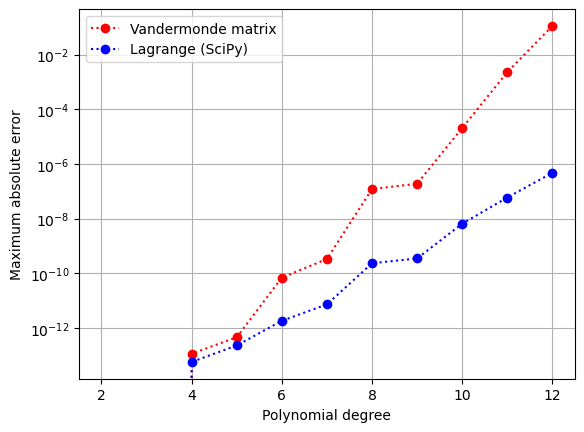

In [10]:
from sympy import symbols, Poly
from sympy.polys.specialpolys import interpolating_poly
from scipy.interpolate import lagrange
from scipy.linalg import solve

max_degree = 12
err_vander   = np.zeros(max_degree-1)
err_lagrange = np.zeros(max_degree-1)

def sympy_coeffs(X, Y):
    '''
    Compute polynomial coefficients (in descending order) using SymPy's 
    symbolic computation. This serves as our reference solution.
    '''
    x = symbols('x')
    
    # Compute interpolating polynomial symbolically
    P = Poly(interpolating_poly(len(X), x, X, Y))
    
    # Extract coefficients (highest degree first)
    coeffs = P.all_coeffs()
    
    # Convert to NumPy array of floats
    return np.array([float(c) for c in coeffs])

degrees = range(2, max_degree+1)
for i, n in enumerate(degrees):
    # Use points evenly spaced in [0, 1] for demonstration
    x = np.linspace(0, 1, n)
    y = np.round((10*np.random.randn(n)))

    # Compute polynomial coefficients by solving the Vandermonde linear system.
    # This method becomes numerically unstable for higher degrees.
    coeffs_vander   = solve(np.vander(x), y)

    # Compute the coefficients numerically using Lagrange's formula
    coeffs_lagrange = lagrange(x, y).coefficients

    # Compute the coefficients using SymPy
    coeffs_sympy    = sympy_coeffs(x, y)

    # Compute errors relative to SymPy (reference) solution
    err_vander[i]   = np.linalg.norm(coeffs_vander   - coeffs_sympy, np.inf)
    err_lagrange[i] = np.linalg.norm(coeffs_lagrange - coeffs_sympy, np.inf)

plt.figure()
plt.semilogy(degrees, err_vander,   'ro:', label='Vandermonde matrix')
plt.semilogy(degrees, err_lagrange, 'bo:', label='Lagrange (SciPy)')
plt.xlabel('Polynomial degree')
plt.ylabel('Maximum absolute error')
plt.legend()
plt.grid(True)
plt.show()

Key Observations:
* Vandermonde method errors grow exponentially with degree
*  Lagrange interpolation avoids explicit formation of the Vandermonde matrix, using a more numerically stable algorithm.

## 6. Strengths and Drawbacks of Vandermonde Matrix Method

### Strengths:

  * **Conceptual Simplicity:** The method directly follows from the definition of a polynomial and the system of linear equations. It's easy to understand why it works.
  * **Direct Solution:** Once the matrix is formed, standard linear algebra techniques (like `np.linalg.solve`) can be used to find the coefficients.

### Drawbacks:

  * **Numerical Instability:** As shown, Vandermonde matrices are often ill-conditioned, especially for higher degrees. This means that small errors in the input data or during computation can lead to very large errors in the calculated polynomial coefficients.
  * **Computational Cost:** For large $n$, forming and inverting the Vandermonde matrix can be computationally expensive (typically $O(n^3)$ operations).
  * **Lack of Basis Locality:** The monomial basis ($1, x, x^2, \dots, x^n$) is not a "local" basis. Changing one data point affects all coefficients, and thus the entire polynomial. This is in contrast to methods like Lagrange or Newton interpolation.

Due to its numerical instability, the Vandermonde matrix method for polynomial interpolation is rarely used in practice for high-degree polynomials. Other methods, such as Lagrange interpolation, Newton's divided differences, or spline interpolation, are preferred for their better numerical properties and efficiency.